In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Light Data Analysis


In [ ]:
df = pd.read_csv("cancer_classification.csv")

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


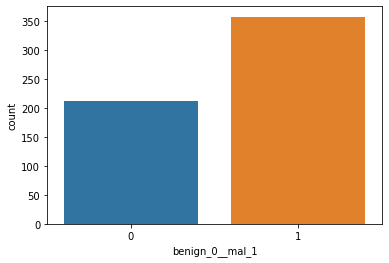

In [ ]:
sns.countplot(x="benign_0__mal_1", data=df)

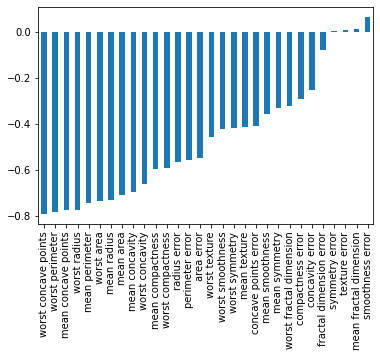

In [ ]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar")

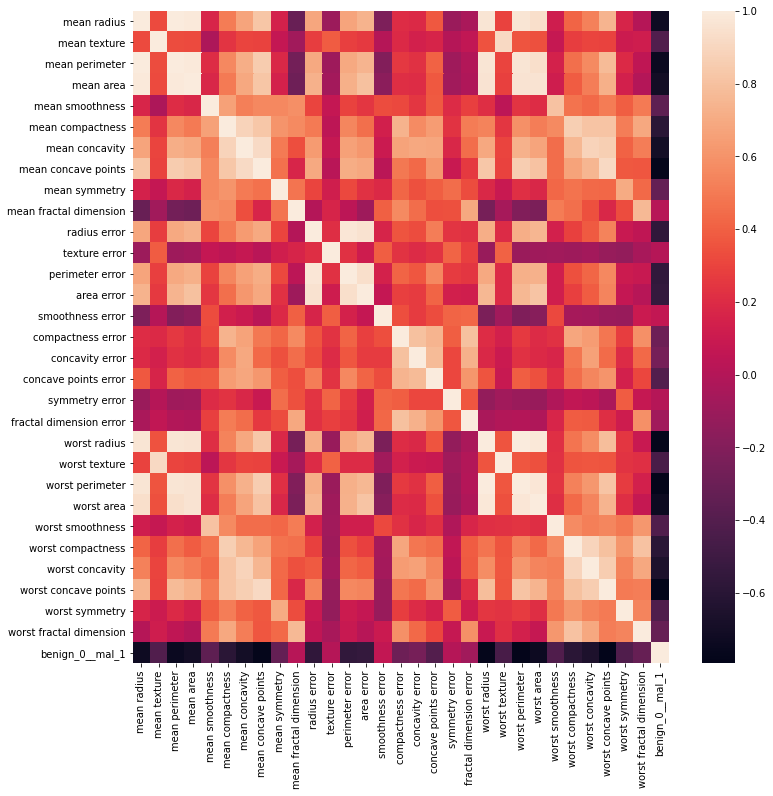

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [ ]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df["benign_0__mal_1"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

# Playing around with some models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30, activation="relu"))

model.add(Dense(15, activation="relu"))

# Binary classification
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6912 - val_loss: 0.6784
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6703 - val_loss: 0.6575
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6460 - val_loss: 0.6329
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6200 - val_loss: 0.6030
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5854 - val_loss: 0.5617
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5414 - val_loss: 0.5093
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4911 - val_loss: 0.4568
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4397 - val_loss: 0.4050
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3915 - val_loss: 0.3600
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3508 - val_loss: 0.3177
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

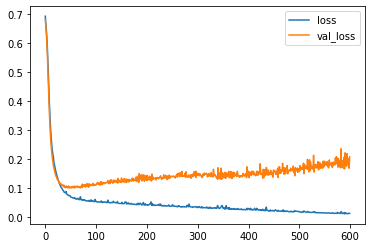

In [ ]:
losses.plot()

In [ ]:
model = Sequential()

model.add(Dense(30, activation="relu"))

model.add(Dense(15, activation="relu"))

# Binary classification
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 | 

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), 
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6822 - val_loss: 0.6646
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6538 - val_loss: 0.6375
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6230 - val_loss: 0.6026
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5868 - val_loss: 0.5625
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5448 - val_loss: 0.5194
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5025 - val_loss: 0.4732
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4589 - val_loss: 0.4277
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4167 - val_loss: 0.3821
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3779 - val_loss: 0.3472
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3455 - val_loss: 0.3135
Epoch 11

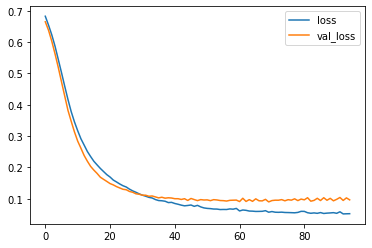

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# trying out dropout layers

from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
# Binary classification
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
model.fit(x=X_train, y=y_train, epochs=450, validation_data=(X_test, y_test), 
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7022 - val_loss: 0.6737
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6994 - val_loss: 0.6494
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6725 - val_loss: 0.6329
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6496 - val_loss: 0.6170
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6497 - val_loss: 0.6031
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6251 - val_loss: 0.5856
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6118 - val_loss: 0.5654
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5909 - val_loss: 0.5447
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5618 - val_loss: 0.5180
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5551 - val_loss: 0.4883
Epoch 11

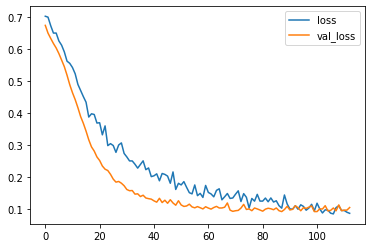

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation="relu", kernel_regularizer="l2"))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.4))
# Binary classification
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")


In [ ]:
model.fit(x=X_train, y=y_train, epochs=450, validation_data=(X_test, y_test))

Epoch 1/450
14/14 [==============================] - 1s 13ms/step - loss: 0.9695 - val_loss: 0.9453
Epoch 2/450
14/14 [==============================] - 0s 4ms/step - loss: 0.9384 - val_loss: 0.9085
Epoch 3/450
14/14 [==============================] - 0s 4ms/step - loss: 0.8890 - val_loss: 0.8684
Epoch 4/450
14/14 [==============================] - 0s 4ms/step - loss: 0.8532 - val_loss: 0.8242
Epoch 5/450
14/14 [==============================] - 0s 5ms/step - loss: 0.8146 - val_loss: 0.7815
Epoch 6/450
14/14 [==============================] - 0s 5ms/step - loss: 0.7694 - val_loss: 0.7306
Epoch 7/450
14/14 [==============================] - 0s 3ms/step - loss: 0.7380 - val_loss: 0.6761
Epoch 8/450
14/14 [==============================] - 0s 5ms/step - loss: 0.6975 - val_loss: 0.6310
Epoch 9/450
14/14 [==============================] - 0s 3ms/step - loss: 0.6393 - val_loss: 0.5857
Epoch 10/450
14/14 [==============================] - 0s 4ms/step - loss: 0.6124 - val_loss: 0.5408
Epoch 11

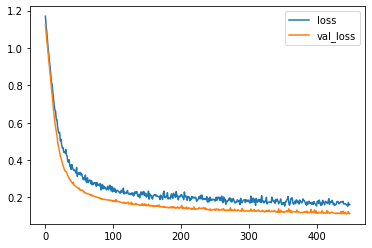

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

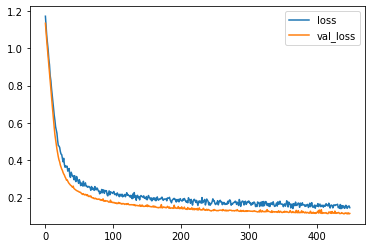

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

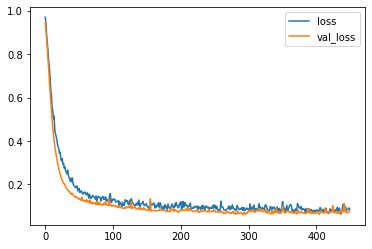

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()